#### <div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 8. <b>Классификация и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Генерация данных</a></li>
        <li><a href="#2">Классификация с линейной регрессией</a></li>
        <li><a href="#3">Логистическая регрессия</a>
        <li><a href="#4">Наивный байесовский классификатор</a>
        <li><a href="#5">Метод опорных векторов (SVM)</a>
        <li><a href="#6">Источники</a>
        </li>
    </ol>
</div>

<p><b>Подключение библиотек</b></p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

from matplotlib.colors import ListedColormap
from matplotlib import cm

In [3]:
from sklearn import linear_model
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Генерация данных</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [4]:
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

In [5]:
clrMap = ListedColormap(["blue", "red", "green"])

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification">make_classification</a>

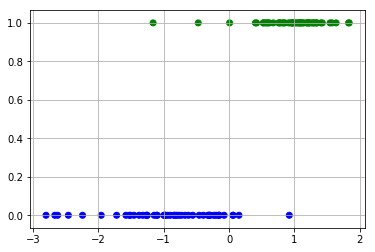

In [6]:
X, Y = make_classification(n_samples=100, n_features=1, n_redundant=0, n_informative=1, n_classes=2, 
                           n_clusters_per_class=1, class_sep=1, random_state=1234)
plt.scatter(X, Y, c=Y, cmap=clrMap)
plt.grid(True)
plt.show()

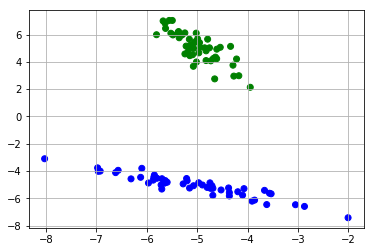

In [7]:
X, Y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=5,
                           random_state=1234)

plt.scatter(X[:,0], X[:,1], c=Y, cmap=clrMap)
plt.grid(True)
plt.show()

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs">make_blobs</a>

In [8]:
from sklearn.datasets import make_blobs

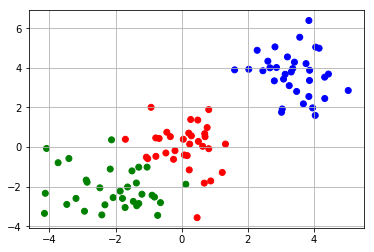

In [9]:
X1, Y1 = make_blobs(n_samples=100, n_features=2, centers=[[3,4], [0,0], [-2,-2]], cluster_std=1, 
                    center_box=(-5,5), random_state=1234)

plt.scatter(X1[:,0], X1[:,1], c=Y1, cmap=clrMap)
plt.grid(True)
plt.show()

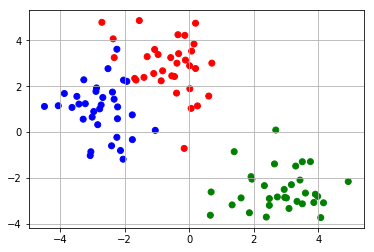

In [10]:
X1, Y1 = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
                    center_box=(-5,5), random_state=1234)

plt.scatter(X1[:,0], X1[:,1], c=Y1, cmap=clrMap)
plt.grid(True)
plt.show()

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_gaussian_quantiles.html#sklearn.datasets.make_gaussian_quantiles">make_gaussian_quantiles</a>

In [11]:
from sklearn.datasets import make_gaussian_quantiles

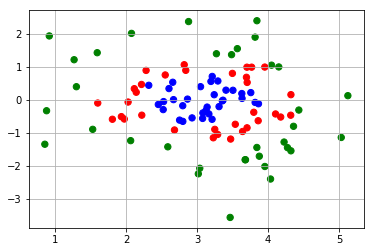

In [12]:
X1, Y1 = make_gaussian_quantiles(n_samples=100, mean=(3,0), n_features=2, n_classes=3, random_state=1234)
plt.scatter(X1[:,0], X1[:,1], marker='o', s=40, c=Y1, cmap=clrMap)
plt.grid(True)
plt.show()

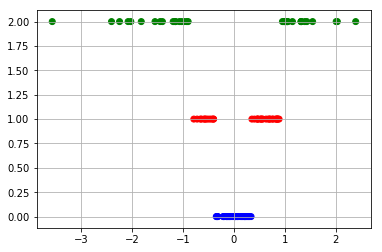

In [13]:
X, Y = make_gaussian_quantiles(n_samples=100, n_features=1, n_classes=3, random_state=1234)

plt.scatter(X, Y, c=Y, cmap=clrMap)
plt.grid(True)
plt.show()

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons">make_moons</a>

In [14]:
from sklearn.datasets import make_moons

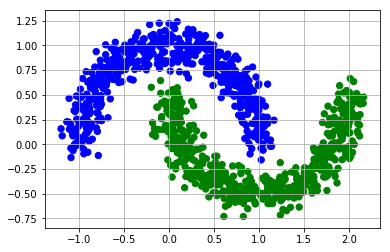

In [15]:
X1, Y1 = make_moons(n_samples=1100, noise=0.1, random_state=1384)
plt.scatter(X1[:,0], X1[:,1], marker='o', s=40, c=Y1, cmap=clrMap)
plt.grid(True)
plt.show()

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles">make_circles</a>

In [16]:
from sklearn.datasets import make_circles

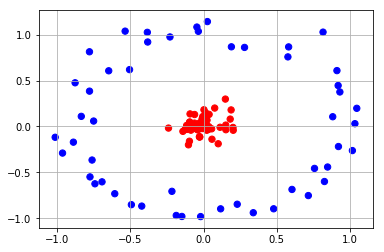

In [140]:
X1, Y1 = make_circles(n_samples=100, noise=0.1, factor=0.01, random_state=1234)
plt.scatter(X1[:,0], X1[:,1], marker='o', s=40, c=Y1, cmap=clrMap)
plt.grid(True)
plt.show()

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Классификация с линейной регрессией</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [18]:
from sklearn import linear_model
from matplotlib import cm

<p><b>1D</b></p>

<p><b>Исходные данные</b></p>

In [19]:
n = 100
x, y = make_classification(n_samples=n, n_features=1, n_redundant=0, n_informative=1, n_classes=2, n_clusters_per_class=1, 
                           class_sep=1, random_state=1000)

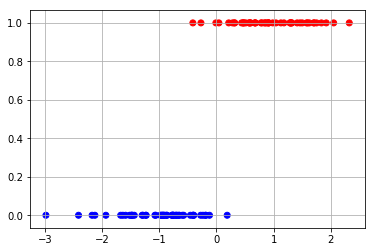

In [20]:
clrMap = ListedColormap(["blue", "red"])
plt.scatter(x, y, c=y, cmap=clrMap)
plt.grid(True)
plt.show()

In [21]:
#Опционально
#count = 0
#while count < 20:
#    indx = np.random.randint(low=0, high=len(x), size=1)
#    
#    if y[indx] > 0:
#        x[indx,0] += 10
#        count += 1

In [22]:
#plt.scatter(x, y, c=y, cmap=clrMap)
#plt.grid(True)
#plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [23]:
tr_pr = 0.7
tr_n = int(np.round(tr_pr*n))

x_train = x[:tr_n]
x_test = x[tr_n:]

y_train = y[:tr_n]
y_test = y[tr_n:]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

In [26]:
linReg = linear_model.LinearRegression()
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
linReg.coef_, linReg.intercept_

(array([ 0.3658681]), 0.5102641461110019)

In [28]:
threshold = 0.5

In [29]:
predTrainVals = np.where(linReg.predict(x_train)>=threshold, 1, 0)
predTrainVals

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0])

In [30]:
(threshold - linReg.intercept_)/linReg.coef_

array([-0.02805423])

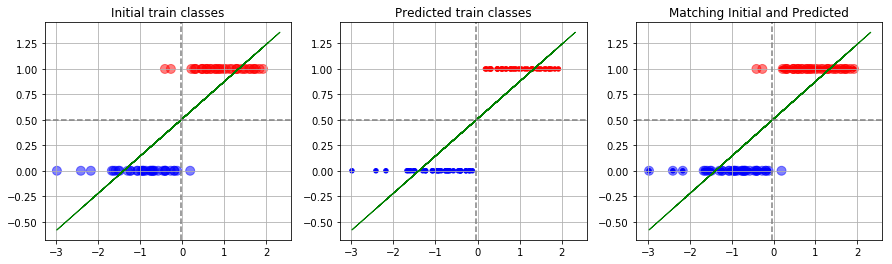

In [31]:
clrMap = ListedColormap(["blue", "red"])

def plotLinRegTrain():
    plt.figure(1, figsize=[15,4])

    plt.subplot(1,3,1)
    plt.title("Initial train classes")
    plt.scatter(x_train, y_train, c=y_train, cmap=clrMap, s=80, alpha=0.5)
    plt.plot(x, linReg.coef_ * x + linReg.intercept_, linewidth=1, color="green")
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline((threshold - linReg.intercept_)/linReg.coef_, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,2)
    plt.title("Predicted train classes")
    plt.scatter(x_train, predTrainVals, s=20, c=predTrainVals, cmap=clrMap)
    plt.plot(x, linReg.coef_ * x + linReg.intercept_, linewidth=1, color="green")
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline((threshold - linReg.intercept_)/linReg.coef_, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,3)
    plt.title("Matching Initial and Predicted")
    plt.scatter(x_train, y_train, c=y_train, cmap=clrMap, s=80, alpha=0.5)
    plt.scatter(x_train, predTrainVals, s=20, c=predTrainVals, cmap=clrMap)
    plt.plot(x, linReg.coef_ * x + linReg.intercept_, linewidth=1, color="green")
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline((threshold - linReg.intercept_)/linReg.coef_, color="0.5", linestyle="--")
    plt.grid(True)
    
plotLinRegTrain()
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

<p>Классификация для тестового набора</p>

In [32]:
predTestVals = np.where(linReg.predict(x_test)>=threshold, 1, 0)
predTestVals

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1])

<p>Показатель точности классификации</p>

In [33]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == predTestVals[i]:
        count += 1
print(count/len(y_test))     

1.0


<p>Графики для тестового набора</p>

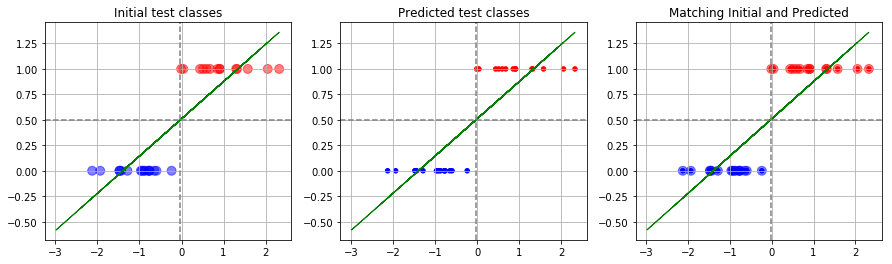

In [34]:
def plotLinRegTest():
    plt.figure(1, figsize=[15,4])

    plt.subplot(1,3,1)
    plt.title("Initial test classes")
    plt.scatter(x_test, y_test, c=y_test, cmap=clrMap, s=80, alpha=0.5)
    plt.plot(x, linReg.coef_ * x + linReg.intercept_, linewidth=1, color="green")
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline((threshold - linReg.intercept_)/linReg.coef_, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,2)
    plt.title("Predicted test classes")
    plt.scatter(x_test, predTestVals, s=20, c=predTestVals, cmap=clrMap)
    plt.plot(x, linReg.coef_ * x + linReg.intercept_, linewidth=1, color="green")
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline((threshold - linReg.intercept_)/linReg.coef_, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,3)
    plt.title("Matching Initial and Predicted")
    plt.scatter(x_test, y_test, c=y_test, cmap=clrMap, s=80, alpha=0.5)
    plt.scatter(x_test, predTestVals, s=20, c=predTestVals, cmap=clrMap)
    plt.plot(x, linReg.coef_ * x + linReg.intercept_, linewidth=1, color="green")
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline((threshold - linReg.intercept_)/linReg.coef_, color="0.5", linestyle="--")
    plt.grid(True)

plotLinRegTest()
plt.show()

<p><b>Графики</b></p>

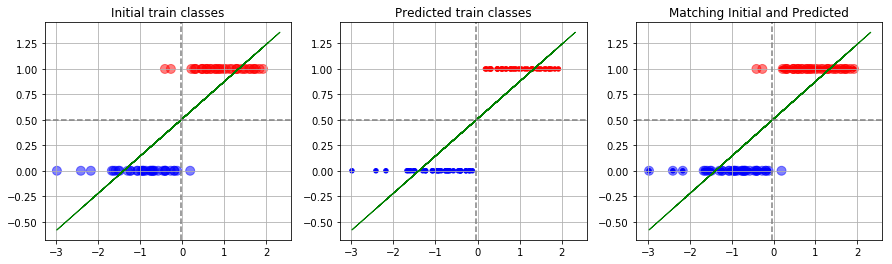

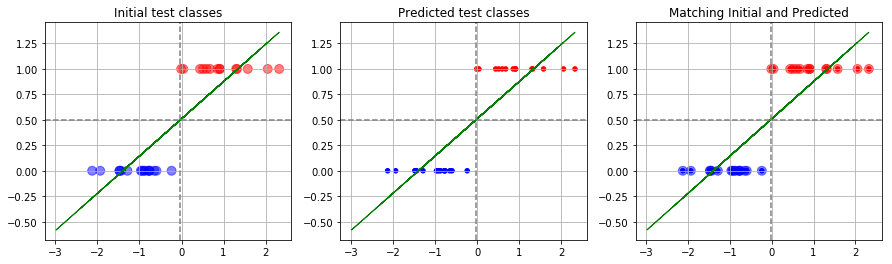

In [35]:
plotLinRegTrain()
plt.show()
plotLinRegTest()
plt.show()

<p><b>2D</b></p>

<p><b>Исходные данные</b></p>

In [36]:
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=0.25,
                           random_state=19)

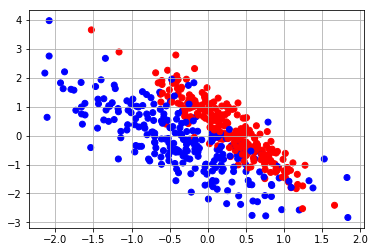

In [37]:
clrMap = ListedColormap(["blue", "red"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

In [39]:
linReg = linear_model.LinearRegression()
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
threshold = 0.5

In [41]:
predTrainVals = np.where(linReg.predict(x_train)>=threshold, 1, 0)
predTrainVals

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1,

<p>Разделительная линия</p>

In [42]:
x1_range = np.linspace(x[:,0].min(), x[:,0].max(), 100)
x2_range = (threshold - linReg.intercept_ - linReg.coef_[0]*x1_range) / linReg.coef_[1]

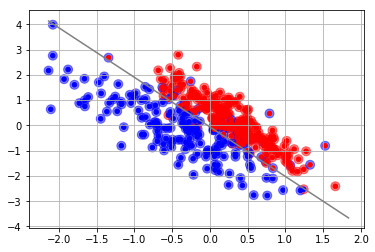

In [43]:
plt.plot(x1_range, x2_range, color="0.5")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:,1], c=predTrainVals, s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [44]:
predTestVals = np.where(linReg.predict(x_test)>=threshold, 1, 0)
predTestVals

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [45]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == predTestVals[i]:
        count += 1
print(count/len(y_test))     

0.8666666666666667


In [46]:
h = lambda x: linReg.intercept_ + linReg.coef_[0]*x[0] + linReg.coef_[1]*x[1]

In [47]:
for i in range(len(x_test)):
    hVal = h(x_test[i,:])
    hVal = np.around(hVal, decimals=2)
    print("Point:", x_test[i,:])
    print("Class 0:", 1 - hVal, end="; ")
    print("Class 1:", hVal, end="; ")
    print("hVal:", hVal - threshold, end="; ")
    #print("Class 1:", hVal + 0.5, end="; ")
    print("Predicted Class:", predTestVals[i], end="; ")
    print("Actual Class:", y_test[i])

Point: [-1.30200217  0.49582786]
Class 0: 1.2; Class 1: -0.2; hVal: -0.7; Predicted Class: 0; Actual Class: 0
Point: [-0.40294816 -0.48750983]
Class 0: 0.92; Class 1: 0.08; hVal: -0.42; Predicted Class: 0; Actual Class: 0
Point: [-0.34451984  1.67632759]
Class 0: 0.13; Class 1: 0.87; hVal: 0.37; Predicted Class: 1; Actual Class: 1
Point: [-0.47518022  1.29477921]
Class 0: 0.35; Class 1: 0.65; hVal: 0.15; Predicted Class: 1; Actual Class: 1
Point: [ 0.93678084 -1.46494071]
Class 0: 0.35; Class 1: 0.65; hVal: 0.15; Predicted Class: 1; Actual Class: 0
Point: [ 0.83917805 -1.72459861]
Class 0: 0.51; Class 1: 0.49; hVal: -0.01; Predicted Class: 0; Actual Class: 0
Point: [-0.74538159  1.31501269]
Class 0: 0.53; Class 1: 0.47; hVal: -0.03; Predicted Class: 0; Actual Class: 0
Point: [-0.57688283  0.64329902]
Class 0: 0.65; Class 1: 0.35; hVal: -0.15; Predicted Class: 0; Actual Class: 0
Point: [ 0.16600127 -0.1134443 ]
Class 0: 0.4; Class 1: 0.6; hVal: 0.1; Predicted Class: 1; Actual Class: 1
P

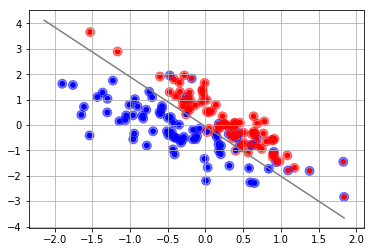

In [48]:
plt.plot(x1_range, x2_range, color="0.5")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=predTestVals, s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Графики</b></p>

In [49]:
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))

In [50]:
points = np.c_[xx.ravel(), yy.ravel()]
#Z = np.where(linReg.predict(points)>=threshold, 1, 0)
Z = linReg.predict(points)
Z = Z.reshape(xx.shape)

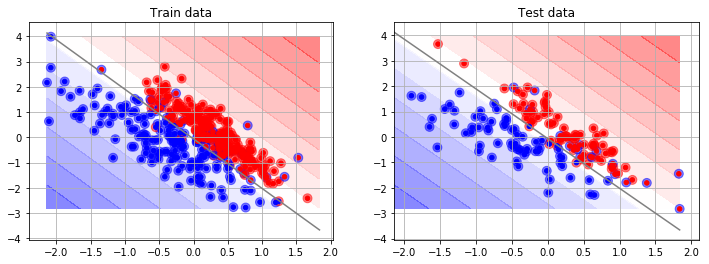

In [51]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, 15, cmap=cm.bwr, alpha=.5)
plt.plot(x1_range, x2_range, color="0.5")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:,1], c=predTrainVals, s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, 15, cmap=cm.bwr, alpha=.5)
plt.plot(x1_range, x2_range, color="0.5")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=predTestVals, s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Логистическая регрессия</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">
sklearn.linear_model.LogisticRegression</a>

<a href="http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression">
Logistic regression</a>

In [52]:
from sklearn import linear_model
from matplotlib import cm

<p><b>1D</b></p>

<p><b>Исходные данные</b></p>

In [53]:
n = 100
x, y = make_classification(n_samples=n, n_features=1, n_redundant=0, n_informative=1, n_classes=2, n_clusters_per_class=1, 
                           class_sep=1, random_state=1000)

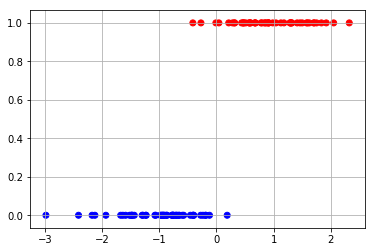

In [54]:
clrMap = ListedColormap(["blue", "red"])
plt.scatter(x, y, c=y, cmap=clrMap)
plt.grid(True)
plt.show()

In [55]:
#Опционально
#count = 0
#while count < 20:
#    indx = np.random.randint(low=0, high=len(x), size=1)
    
#    if y[indx] > 0:
#        x[indx,0] += 10
#        count += 1

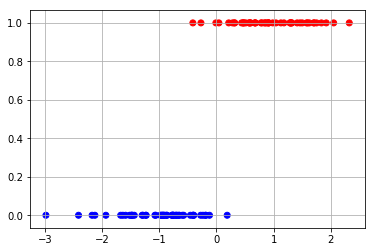

In [56]:
plt.scatter(x, y, c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

In [58]:
logReg1D = linear_model.LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, 
                                         solver="lbfgs", random_state=12345)

In [59]:
logReg1D.fit(x_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=12345,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [60]:
logReg1D.coef_

array([[ 6.1436941]])

In [61]:
logReg1D.intercept_

array([ 0.23987693])

In [62]:
f = lambda x: 1 / (1+np.exp(-(logReg1D.intercept_+logReg1D.coef_[0]*x)))
#f = lambda x: 1 / (1+np.exp(-(15*x+1)))

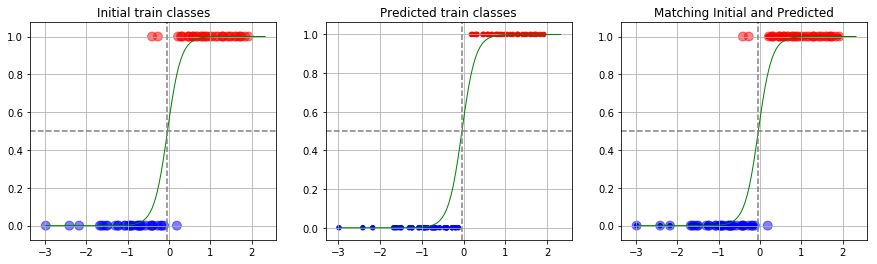

In [63]:
thresholdY = 0.5
thresholdX = (np.log((1-thresholdY)/thresholdY) - logReg1D.intercept_)/logReg1D.coef_[0]

xx = np.linspace(x.min(), x.max(), 100)

def plotLogRegTrain1D():
    plt.figure(1, figsize=[15,4])

    plt.subplot(1,3,1)
    plt.title("Initial train classes")
    plt.plot(xx, f(xx), linewidth=1, color="green")
    plt.scatter(x_train, y_train, c=y_train, cmap=clrMap, s=80, alpha=0.5)
    plt.axhline(thresholdY, color="0.5", linestyle="--")
    plt.axvline(thresholdX, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,2)
    plt.title("Predicted train classes")
    plt.plot(xx, f(xx), linewidth=1, color="green")
    plt.scatter(x_train, logReg1D.predict(x_train), s=20, c=logReg1D.predict(x_train), cmap=clrMap)
    plt.axhline(thresholdY, color="0.5", linestyle="--")
    plt.axvline(thresholdX, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,3)
    plt.title("Matching Initial and Predicted")
    plt.plot(xx, f(xx), linewidth=1, color="green")
    plt.scatter(x_train, y_train, c=y_train, cmap=clrMap, s=80, alpha=0.5)
    plt.scatter(x_train, logReg1D.predict(x_train), s=20, c=logReg1D.predict(x_train), cmap=clrMap)
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline(thresholdX, color="0.5", linestyle="--")
    plt.grid(True)
    
plotLogRegTrain1D()
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [64]:
score = logReg1D.score(x_test, y_test)
score

1.0

In [65]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == logReg1D.predict(x_test[i]):
        count += 1
print(count/len(y_test))   

1.0


C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

In [66]:
logReg1D.predict_proba(x_test)

array([[  9.99529359e-01,   4.70641473e-04],
       [  9.94929953e-01,   5.07004698e-03],
       [  7.70273172e-01,   2.29726828e-01],
       [  9.96655879e-01,   3.34412060e-03],
       [  2.65645323e-04,   9.99734355e-01],
       [  1.98793056e-02,   9.80120694e-01],
       [  9.76759846e-01,   2.32401541e-02],
       [  2.90764111e-03,   9.97092359e-01],
       [  9.93943325e-01,   6.05667486e-03],
       [  4.87896382e-05,   9.99951210e-01],
       [  1.20216938e-02,   9.87978306e-01],
       [  9.89509757e-01,   1.04902430e-02],
       [  2.65881145e-06,   9.99997341e-01],
       [  9.99813769e-01,   1.86230802e-04],
       [  3.76273840e-01,   6.23726160e-01],
       [  2.37262060e-04,   9.99762738e-01],
       [  9.89336803e-01,   1.06631969e-02],
       [  9.99997296e-01,   2.70415355e-06],
       [  9.99850894e-01,   1.49106104e-04],
       [  9.68375611e-01,   3.16243889e-02],
       [  9.99854939e-01,   1.45060764e-04],
       [  4.06951044e-03,   9.95930490e-01],
       [  

In [67]:
for i in range(len(x_test)):
    p = np.around(logReg1D.predict_proba(x_test[i]), decimals=5).ravel()
    print("Point:", x_test[i])
    print("Class 0:", p[0], end="; ")
    print("Class 1:", p[1], end="; ")
    print("Predicted Class:", logReg1D.predict(x_test[i])[0], end="; ")
    print("Actual Class:", y_test[i])

Point: [-1.2860048]
Class 0: 0.99953; Class 1: 0.00047; Predicted Class: 0; Actual Class: 0
Point: [-0.89835189]
Class 0: 0.99493; Class 1: 0.00507; Predicted Class: 0; Actual Class: 0
Point: [-0.23597061]
Class 0: 0.77027; Class 1: 0.22973; Predicted Class: 0; Actual Class: 0
Point: [-0.96636952]
Class 0: 0.99666; Class 1: 0.00334; Predicted Class: 0; Actual Class: 0
Point: [ 1.3010423]
Class 0: 0.00027; Class 1: 0.99973; Predicted Class: 1; Actual Class: 1
Point: [ 0.5954267]
Class 0: 0.01988; Class 1: 0.98012; Predicted Class: 1; Actual Class: 1
Point: [-0.64753162]
Class 0: 0.97676; Class 1: 0.02324; Predicted Class: 0; Actual Class: 0
Point: [ 0.91111703]
Class 0: 0.00291; Class 1: 0.99709; Predicted Class: 1; Actual Class: 1
Point: [-0.86924838]
Class 0: 0.99394; Class 1: 0.00606; Predicted Class: 0; Actual Class: 0
Point: [ 1.57691231]
Class 0: 5e-05; Class 1: 0.99995; Predicted Class: 1; Actual Class: 1
Point: [ 0.67859351]
Class 0: 0.01202; Class 1: 0.98798; Predicted Class: 1

C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

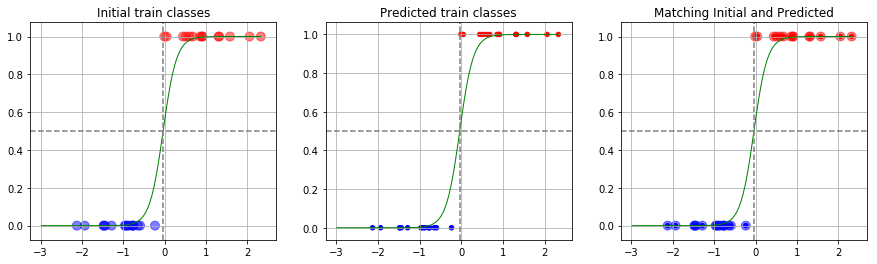

In [68]:
def plotLogRegTest1D():
    plt.figure(1, figsize=[15,4])

    plt.subplot(1,3,1)
    plt.title("Initial train classes")
    plt.plot(xx, f(xx), linewidth=1, color="green")
    plt.scatter(x_test, y_test, c=y_test, cmap=clrMap, s=80, alpha=0.5)
    plt.axhline(thresholdY, color="0.5", linestyle="--")
    plt.axvline(thresholdX, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,2)
    plt.title("Predicted train classes")
    plt.plot(xx, f(xx), linewidth=1, color="green")
    plt.scatter(x_test, logReg1D.predict(x_test), s=20, c=logReg1D.predict(x_test), cmap=clrMap)
    plt.axhline(thresholdY, color="0.5", linestyle="--")
    plt.axvline(thresholdX, color="0.5", linestyle="--")
    plt.grid(True)

    plt.subplot(1,3,3)
    plt.title("Matching Initial and Predicted")
    plt.plot(xx, f(xx), linewidth=1, color="green")
    plt.scatter(x_test, y_test, c=y_test, cmap=clrMap, s=80, alpha=0.5)
    plt.scatter(x_test, logReg1D.predict(x_test), s=20, c=logReg1D.predict(x_test), cmap=clrMap)
    plt.axhline(threshold, color="0.5", linestyle="--")
    plt.axvline(thresholdX, color="0.5", linestyle="--")
    plt.grid(True)
    
plotLogRegTest1D()
plt.show()

<p><b>Графики</b></p>

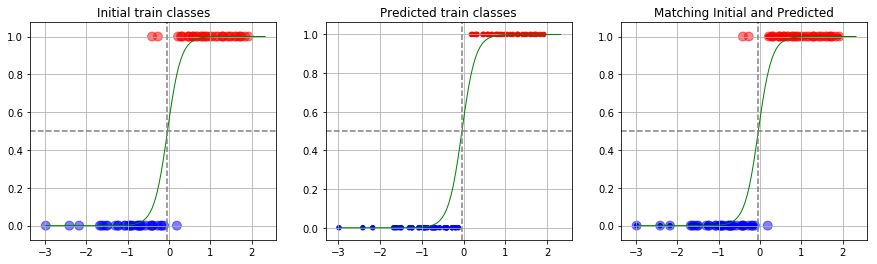

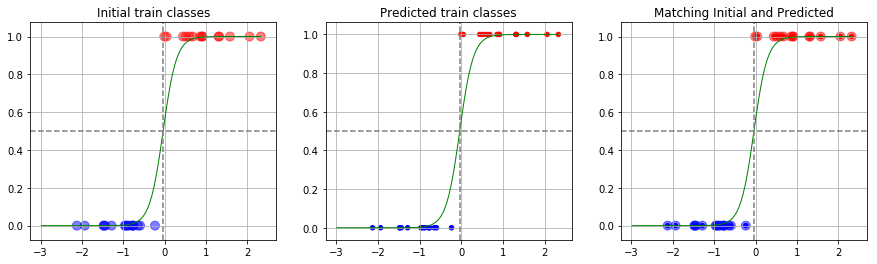

In [69]:
plotLogRegTrain1D()
plt.show()
plotLogRegTest1D()
plt.show()

<p><b>2D</b></p>

<p><b>Исходные данные</b></p>

In [70]:
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=0.25,
                           random_state=19)

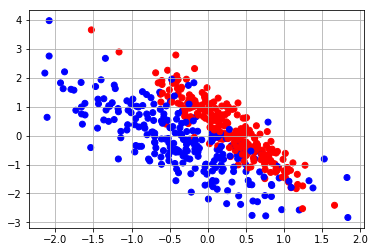

In [71]:
clrMap = ListedColormap(["blue", "red"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

In [73]:
logReg = linear_model.LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, 
                                         solver="lbfgs", random_state=1234)

In [74]:
logReg.fit(x_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=1234,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [75]:
logReg.coef_

array([[ 7.25960593,  3.64423007]])

In [76]:
logReg.intercept_

array([-0.53151912])

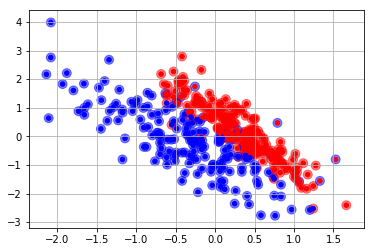

In [77]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=logReg.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [78]:
score = logReg.score(x_test, y_test)
score

0.84666666666666668

In [79]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == logReg.predict(x_test[i]):
        count += 1
print(count/len(y_test))        

0.8466666666666667


C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

In [80]:
logReg.predict_proba(x_test)

array([[  9.99718931e-01,   2.81068522e-04],
       [  9.94692760e-01,   5.30724007e-03],
       [  4.40944148e-02,   9.55905585e-01],
       [  3.23587605e-01,   6.76412395e-01],
       [  2.82811186e-01,   7.17188814e-01],
       [  6.73542494e-01,   3.26457506e-01],
       [  7.59599840e-01,   2.40400160e-01],
       [  9.14911194e-01,   8.50888062e-02],
       [  4.35322528e-01,   5.64677472e-01],
       [  4.00144181e-02,   9.59985582e-01],
       [  9.99461111e-01,   5.38888779e-04],
       [  9.18330197e-01,   8.16698033e-02],
       [  1.66899399e-02,   9.83310060e-01],
       [  1.60066295e-02,   9.83993371e-01],
       [  9.99744448e-01,   2.55551564e-04],
       [  6.70636330e-01,   3.29363670e-01],
       [  9.57962563e-01,   4.20374374e-02],
       [  8.63982359e-02,   9.13601764e-01],
       [  1.77697945e-01,   8.22302055e-01],
       [  4.47584957e-01,   5.52415043e-01],
       [  8.44017788e-01,   1.55982212e-01],
       [  7.10514724e-02,   9.28948528e-01],
       [  

In [81]:
z = lambda x: logReg.intercept_[0] + logReg.coef_[0,0]*x[0] + logReg.coef_[0,1]*x[1]
z(x_test[0,:])

-8.176630960987664

In [82]:
zVal = z(x_test[0,:])
p = np.around(np.exp(zVal) / (np.exp(zVal) + 1), decimals=2)
p

0.0

In [83]:
for i in range(len(x_test)):
    zVal = z(x_test[i,:])
    p = np.around(np.exp(zVal) / (np.exp(zVal) + 1), decimals=2)
    print("Point:", x_test[i,:])
    print("Class 0:", 1 - p, end="; ")
    print("Class 1:", p, end="; ")
    print("Predicted Class:", logReg.predict(x_test[i,:])[0], end="; ")
    print("Actual Class:", y_test[i])

Point: [-1.30200217  0.49582786]
Class 0: 1.0; Class 1: 0.0; Predicted Class: 0; Actual Class: 0
Point: [-0.40294816 -0.48750983]
Class 0: 0.99; Class 1: 0.01; Predicted Class: 0; Actual Class: 0
Point: [-0.34451984  1.67632759]
Class 0: 0.04; Class 1: 0.96; Predicted Class: 1; Actual Class: 1
Point: [-0.47518022  1.29477921]
Class 0: 0.32; Class 1: 0.68; Predicted Class: 1; Actual Class: 1
Point: [ 0.93678084 -1.46494071]
Class 0: 0.28; Class 1: 0.72; Predicted Class: 1; Actual Class: 0
Point: [ 0.83917805 -1.72459861]
Class 0: 0.67; Class 1: 0.33; Predicted Class: 0; Actual Class: 0
Point: [-0.74538159  1.31501269]
Class 0: 0.76; Class 1: 0.24; Predicted Class: 0; Actual Class: 0
Point: [-0.57688283  0.64329902]
Class 0: 0.91; Class 1: 0.09; Predicted Class: 0; Actual Class: 0
Point: [ 0.16600127 -0.1134443 ]
Class 0: 0.44; Class 1: 0.56; Predicted Class: 1; Actual Class: 1
Point: [ 0.01507075  0.98780531]
Class 0: 0.04; Class 1: 0.96; Predicted Class: 1; Actual Class: 1
Point: [-1.0

C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

 1; Actual Class: 1
Point: [ 0.17567748  0.04680984]
Class 0: 0.29; Class 1: 0.71; Predicted Class: 1; Actual Class: 0
Point: [ 0.17653732 -1.01603191]
Class 0: 0.95; Class 1: 0.05; Predicted Class: 0; Actual Class: 0
Point: [-1.00718227  0.79577073]
Class 0: 0.99; Class 1: 0.01; Predicted Class: 0; Actual Class: 0
Point: [-0.83788694  0.37111609]
Class 0: 0.99; Class 1: 0.01; Predicted Class: 0; Actual Class: 0
Point: [-0.32499421 -0.6974929 ]
Class 0: 1.0; Class 1: 0.0; Predicted Class: 0; Actual Class: 0
Point: [-1.64575195  0.39834931]
Class 0: 1.0; Class 1: 0.0; Predicted Class: 0; Actual Class: 0
Point: [-0.12831933 -0.56187284]
Class 0: 0.97; Class 1: 0.03; Predicted Class: 0; Actual Class: 0
Point: [-0.02941706  1.17584047]
Class 0: 0.03; Class 1: 0.97; Predicted Class: 1; Actual Class: 1
Point: [ 0.65209769 -2.28606439]
Class 0: 0.98; Class 1: 0.02; Predicted Class: 0; Actual Class: 0
Point: [-0.3375825   1.31032722]
Class 0: 0.14; Class 1: 0.86; Predicted Class: 1; Actual Cla

C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

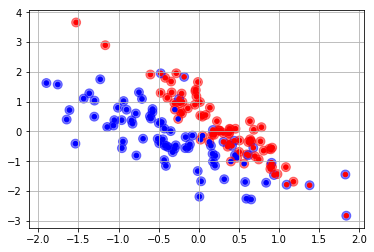

In [84]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=logReg.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Графики</b></p>

In [85]:
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
#xx[:,:], yy[:,:]

In [86]:
xx.ravel(), yy.ravel()

(array([-2.13829359, -2.12829359, -2.11829359, ...,  1.81170641,
         1.82170641,  1.83170641]),
 array([-2.83286384, -2.83286384, -2.83286384, ...,  3.97713616,
         3.97713616,  3.97713616]))

In [87]:
points = np.c_[xx.ravel(), yy.ravel()]
#points[:3]

In [88]:
points_2 = list(zip(xx.ravel(), yy.ravel()))
#points_2[40:50]

In [89]:
Z = logReg.predict_proba(points)[:, 1]
Z = Z.reshape(xx.shape)
#Z

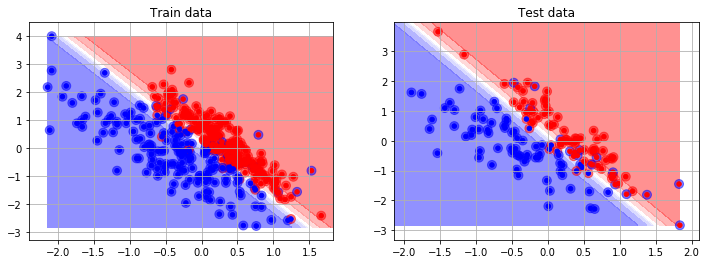

In [90]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=cm.bwr, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=logReg.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=cm.bwr, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=logReg.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p><b>Пример с тремя классами</b></p>

<p><b>Исходные данные</b></p>

In [91]:
n = 100
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=1,
                           random_state=1234)

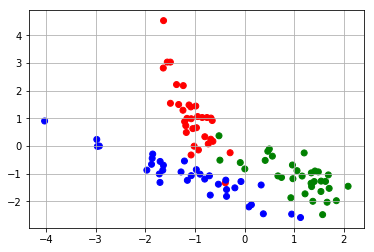

In [92]:
clrMap = ListedColormap(["blue", "red", "green"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

In [94]:
logRegMultClass = linear_model.LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, 
                                         solver="lbfgs", multi_class="ovr", random_state=12345)

In [95]:
logRegMultClass.fit(x_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=12345,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [96]:
logRegMultClass.coef_

array([[-5.81140156, -6.56654443],
       [ 0.77795846,  3.67662826],
       [ 5.37484674,  1.75310333]])

In [97]:
logRegMultClass.intercept_

array([-8.71654181,  0.2982256 ,  0.55524661])

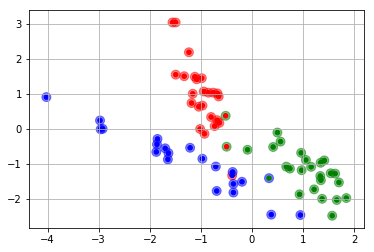

In [98]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=logRegMultClass.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [99]:
score = logRegMultClass.score(x_test, y_test)
score

0.93333333333333335

In [100]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == logRegMultClass.predict(x_test[i]):
        count += 1
print(count/len(y_test))    

0.9333333333333333


C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

In [101]:
pr = np.around(logRegMultClass.predict_proba(x_test), decimals=2)
pr = np.column_stack((pr, logRegMultClass.predict(x_test)))

#Class_0, Class_1, Class_2, Prediction
pr

array([[ 0.  ,  0.99,  0.01,  1.  ],
       [ 0.98,  0.02,  0.  ,  0.  ],
       [ 0.95,  0.  ,  0.05,  0.  ],
       [ 0.49,  0.  ,  0.51,  2.  ],
       [ 0.09,  0.15,  0.76,  2.  ],
       [ 0.99,  0.01,  0.  ,  0.  ],
       [ 0.  ,  0.09,  0.91,  2.  ],
       [ 0.01,  0.61,  0.38,  1.  ],
       [ 0.99,  0.01,  0.  ,  0.  ],
       [ 0.99,  0.01,  0.  ,  0.  ],
       [ 0.99,  0.01,  0.  ,  0.  ],
       [ 0.82,  0.02,  0.17,  0.  ],
       [ 0.  ,  0.37,  0.63,  2.  ],
       [ 0.92,  0.  ,  0.08,  0.  ],
       [ 0.  ,  0.98,  0.02,  1.  ],
       [ 0.  ,  0.34,  0.66,  2.  ],
       [ 0.  ,  0.97,  0.03,  1.  ],
       [ 0.  ,  0.97,  0.03,  1.  ],
       [ 0.73,  0.26,  0.01,  0.  ],
       [ 0.98,  0.02,  0.  ,  0.  ],
       [ 0.  ,  0.11,  0.89,  2.  ],
       [ 0.  ,  0.95,  0.05,  1.  ],
       [ 0.01,  0.98,  0.01,  1.  ],
       [ 0.  ,  0.7 ,  0.3 ,  1.  ],
       [ 0.99,  0.01,  0.01,  0.  ],
       [ 0.  ,  0.03,  0.97,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
 

In [102]:
z_cl_0 = lambda x: logRegMultClass.intercept_[0] + logRegMultClass.coef_[0,0]*x[:,0] + logRegMultClass.coef_[0,1]*x[:,1]
z_cl_1 = lambda x: logRegMultClass.intercept_[1] + logRegMultClass.coef_[1,0]*x[:,0] + logRegMultClass.coef_[1,1]*x[:,1]
z_cl_2 = lambda x: logRegMultClass.intercept_[2] + logRegMultClass.coef_[2,0]*x[:,0] + logRegMultClass.coef_[2,1]*x[:,1]

zVal_cl_0 = z_cl_0(x_test)
zVal_cl_1 = z_cl_1(x_test)
zVal_cl_2 = z_cl_2(x_test)

p_cl_0 = np.around(np.exp(zVal_cl_0) / (np.exp(zVal_cl_0) + 1), decimals=2)
p_cl_1 = np.around(np.exp(zVal_cl_1) / (np.exp(zVal_cl_1) + 1), decimals=2)
p_cl_2 = np.around(np.exp(zVal_cl_2) / (np.exp(zVal_cl_2) + 1), decimals=2)

st = np.column_stack((p_cl_0, p_cl_1, p_cl_2))
st = np.column_stack((st, st.argmax(axis=1)))

#Class_0, Class_1, Class_2, Prediction
st

array([[ 0.  ,  0.93,  0.01,  1.  ],
       [ 0.96,  0.02,  0.  ,  0.  ],
       [ 0.99,  0.  ,  0.06,  0.  ],
       [ 0.85,  0.  ,  0.89,  2.  ],
       [ 0.04,  0.06,  0.3 ,  2.  ],
       [ 0.99,  0.01,  0.  ,  0.  ],
       [ 0.  ,  0.1 ,  1.  ,  2.  ],
       [ 0.  ,  0.3 ,  0.19,  1.  ],
       [ 1.  ,  0.01,  0.  ,  0.  ],
       [ 0.98,  0.01,  0.  ,  0.  ],
       [ 1.  ,  0.01,  0.  ,  0.  ],
       [ 0.54,  0.01,  0.11,  0.  ],
       [ 0.  ,  0.58,  1.  ,  2.  ],
       [ 0.99,  0.  ,  0.08,  0.  ],
       [ 0.  ,  0.98,  0.02,  1.  ],
       [ 0.  ,  0.49,  0.94,  2.  ],
       [ 0.  ,  1.  ,  0.04,  1.  ],
       [ 0.  ,  0.96,  0.03,  1.  ],
       [ 0.42,  0.15,  0.  ,  0.  ],
       [ 0.99,  0.02,  0.  ,  0.  ],
       [ 0.  ,  0.12,  1.  ,  2.  ],
       [ 0.  ,  1.  ,  0.05,  1.  ],
       [ 0.01,  0.76,  0.01,  1.  ],
       [ 0.  ,  1.  ,  0.43,  1.  ],
       [ 0.97,  0.01,  0.01,  0.  ],
       [ 0.  ,  0.03,  1.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
 

In [103]:
for i in range(len(x_test)):
    p_vals = np.around(logRegMultClass.predict_proba(x_test[i]), decimals=2)
    print("Point:", x_test[i,:])
    print("Class 0:", p_vals[0,0], end="; ")
    print("Class 1:", p_vals[0,1], end="; ")
    print("Class 2:", p_vals[0,2], end="; ")
    print("Predicted Class:", logRegMultClass.predict(x_test[i,:])[0], end="; ")
    print("Actual Class:", y_test[i])

Point: [-1.20651557  0.88093575]
Class 0: 0.0; Class 1: 0.99; Class 2: 0.01; Predicted Class: 1; Actual Class: 1
Point: [-0.89664019 -1.0202059 ]
Class 0: 0.98; Class 1: 0.02; Class 2: 0.0; Predicted Class: 0; Actual Class: 0
Point: [ 0.08757763 -2.20398816]
Class 0: 0.95; Class 1: 0.0; Class 2: 0.05; Predicted Class: 0; Actual Class: 0
Point: [ 1.12709134 -2.58874288]
Class 0: 0.49; Class 1: 0.0; Class 2: 0.51; Predicted Class: 2; Actual Class: 0
Point: [ 0.00587275 -0.83143826]
Class 0: 0.09; Class 1: 0.15; Class 2: 0.76; Predicted Class: 2; Actual Class: 2
Point: [-1.07296197 -1.07332837]
Class 0: 0.99; Class 1: 0.01; Class 2: 0.0; Predicted Class: 0; Actual Class: 0
Point: [ 1.6877527  -1.04729733]
Class 0: 0.0; Class 1: 0.09; Class 2: 0.91; Predicted Class: 2; Actual Class: 2
Point: [-0.2905554  -0.24508234]
Class 0: 0.01; Class 1: 0.61; Class 2: 0.38; Predicted Class: 1; Actual Class: 1
Point: [-1.15155207 -1.24342242]
Class 0: 0.99; Class 1: 0.01; Class 2: 0.0; Predicted Class: 

C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

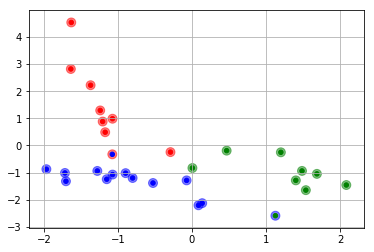

In [104]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=logRegMultClass.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Графики</b></p>

In [105]:
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
#xx[:,:3], yy[:,:3]

In [106]:
points = np.c_[xx.ravel(), yy.ravel()]
Z = logRegMultClass.predict(points)
Z = Z.reshape(xx.shape)
#Z

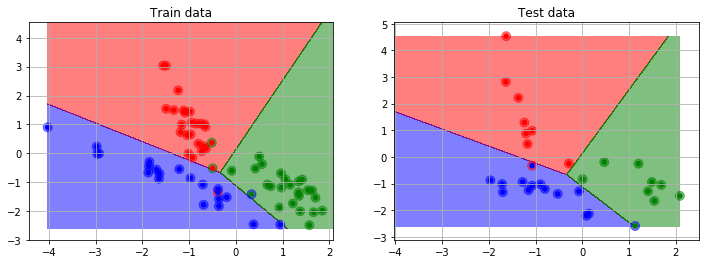

In [107]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=logRegMultClass.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=logRegMultClass.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<a name="4"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">4. Наивный байесовский классификатор</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/naive_bayes.html">1.9. Naive Bayes</a><br>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB">GaussianNB</a>

In [108]:
from sklearn.naive_bayes import GaussianNB

<p><b>Исходные данные</b></p>

In [109]:
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=0.25,
                           random_state=19)

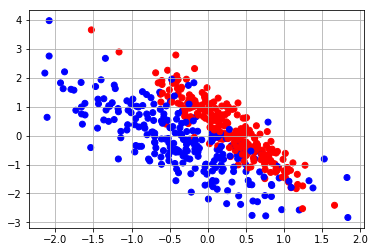

In [110]:
clrMap = ListedColormap(["blue", "red"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

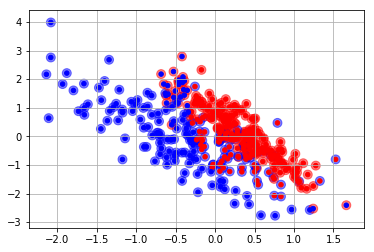

In [112]:
nBClass = GaussianNB()
nBClass.fit(x_train, y_train)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=nBClass.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [113]:
score = nBClass.score(x_test, y_test)
score

0.78666666666666663

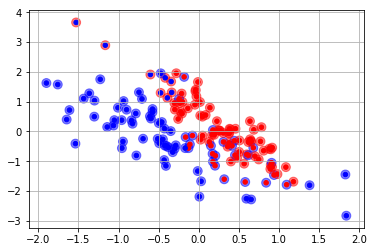

In [114]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=nBClass.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Графики</b></p>

In [115]:
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
xx[:,:3], yy[:,:3]

points = np.c_[xx.ravel(), yy.ravel()]

Z = nBClass.predict_proba(points)[:, 1]
Z = Z.reshape(xx.shape)

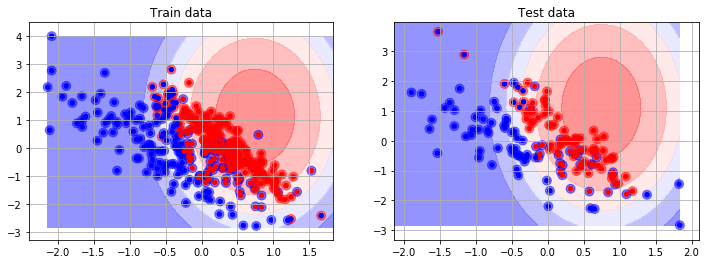

In [116]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=cm.bwr, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=nBClass.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=cm.bwr, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=nBClass.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<a name="5"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">5. Метод опорных векторов (SVM)</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/svm.html">1.4. Support Vector Machines</a><br>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">sklearn.svm.SVC</a><br>
<a href="http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html">SVM Margins Example</a>

In [117]:
from sklearn import svm

<p><b>Исходные данные</b></p>

In [118]:
n = 500
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=0.25,
                           random_state=19)

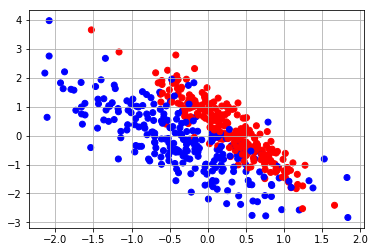

In [119]:
clrMap = ListedColormap(["blue", "red"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

<p><b>Обучение</b></p>

In [121]:
svmCl = svm.SVC(kernel="linear")

In [122]:
svmCl.fit(x_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
svmCl.support_vectors_

array([[ 0.56502794, -0.53307048],
       [ 1.06539216, -1.57820278],
       [-0.25520023,  1.74096767],
       [-0.36559808,  0.27194556],
       [ 0.15886143, -0.78505622],
       [ 0.79044866,  0.4695821 ],
       [ 0.0532019 , -0.19346069],
       [ 0.04356576, -0.19020161],
       [-0.15561468,  0.6505194 ],
       [ 0.0467579 , -0.04852302],
       [ 0.73781601, -1.42918795],
       [ 0.24402473, -0.09959644],
       [-0.19051412,  0.51007218],
       [-2.08172553,  3.98160542],
       [ 0.4188234 , -0.31465495],
       [ 0.39206084, -0.79571946],
       [-0.38985178,  0.76853535],
       [ 0.1212426 , -0.71855807],
       [-0.34247873,  0.42745525],
       [ 0.75511553, -0.67943936],
       [ 0.70189613, -0.64998799],
       [ 0.44123662, -0.74413182],
       [ 0.68080995, -1.25350115],
       [-0.62339177,  0.91106707],
       [ 0.38486695, -0.66402416],
       [-0.40973349,  0.57105483],
       [ 1.32801786, -1.5594403 ],
       [ 0.49624693, -0.99873869],
       [ 1.20006488,

In [124]:
svmCl.support_ 

array([  8,  27,  40,  41,  44,  52,  54,  55,  56,  60,  61,  77,  80,
        92,  97, 100, 106, 113, 126, 128, 145, 148, 162, 166, 188, 192,
       193, 207, 215, 222, 228, 229, 237, 244, 249, 251, 254, 262, 267,
       271, 276, 277, 278, 280, 287, 293, 297, 306, 307, 310, 311, 312,
       317, 319, 331, 336, 337, 341, 349,   3,   4,  12,  16,  23,  46,
        49,  50,  66,  67,  69,  70,  76,  79,  82,  84,  86,  89,  96,
       107, 115, 135, 138, 139, 140, 146, 151, 152, 154, 160, 163, 164,
       170, 173, 179, 180, 186, 194, 200, 218, 240, 266, 272, 279, 281,
       286, 289, 294, 295, 299, 300, 302, 314, 320, 324, 335, 338, 340, 344])

In [125]:
svmCl.n_support_

array([59, 59])

In [126]:
svmCl.coef_

array([[ 3.80076029,  1.86752483]])

In [127]:
svmCl.intercept_

array([-0.11854131])

In [128]:
f = lambda x: svmCl.intercept_[0] + svmCl.coef_[0,0]*x[:,0] + svmCl.coef_[0,1]*x[:,1]

In [129]:
w = svmCl.coef_[0]
a = -w[0] / w[1]
xx1 = np.linspace(x[:,0].min(), x[:,0].max())
xx2 = a * xx1 - (svmCl.intercept_[0]) / w[1]

In [130]:
margin = 1 / np.sqrt(np.sum(svmCl.coef_ ** 2))
xx2_down = xx2 + a * margin
xx2_up = xx2 - a * margin

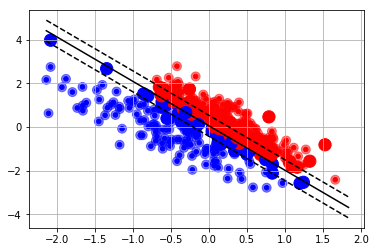

In [131]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=svmCl.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)
plt.plot(xx1, xx2, 'k-')
plt.plot(xx1, xx2_down, 'k--')
plt.plot(xx1, xx2_up, 'k--')
plt.scatter(svmCl.support_vectors_[:,0], svmCl.support_vectors_[:,1], c=svmCl.predict(svmCl.support_vectors_), facecolors="none",
            s=150, cmap=clrMap)
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [132]:
score = svmCl.score(x_test, y_test)
score

0.85999999999999999

In [133]:
np.around(svmCl.decision_function(x_test), decimals=2)

array([-4.14, -2.56,  1.7 ,  0.49,  0.71, -0.15, -0.5 , -1.11,  0.3 ,
        1.78, -3.79, -1.1 ,  2.24,  2.34, -4.18, -0.21, -1.49,  1.38,
        0.97,  0.29, -0.77,  1.5 , -2.31,  1.76, -2.08,  1.75,  1.18,
        1.74,  0.95, -3.85,  0.39,  1.36, -0.87,  1.79,  0.64, -1.35,
       -2.46, -2.61, -2.66, -5.63, -1.66,  1.97, -1.91,  1.05,  0.92,
        0.81,  2.61, -3.14,  3.11, -1.1 , -3.51, -1.98,  1.65, -3.56,
        2.59,  1.2 ,  0.04, -1.43, -0.55,  0.86, -4.58, -4.19,  1.76,
       -1.28,  0.11,  0.94,  0.  ,  1.21, -0.86, -2.18,  1.43,  0.51,
       -4.81,  2.95,  1.23, -3.06, -1.78, -0.91, -6.73,  1.9 , -2.73,
        1.24,  1.82,  0.39, -1.81,  1.37, -3.22,  1.16,  0.93, -2.92,
       -3.41,  2.35, -1.57,  0.96,  0.98,  1.56,  0.91, -1.51,  0.71,
        0.91, -2.66, -0.49, -0.31,  0.25,  0.99, -2.62,  1.18, -0.28,
       -2.56, -2.34,  1.73,  2.94, -2.09, -4.34, -2.52,  2.47,  0.51,
       -3.12,  0.6 ,  0.73,  2.18, -1.5 , -0.44, -1.35,  0.86,  2.13,
       -1.48,  4.12,

In [134]:
np.around(f(x_test), decimals=2)

array([-4.14, -2.56,  1.7 ,  0.49,  0.71, -0.15, -0.5 , -1.11,  0.3 ,
        1.78, -3.79, -1.1 ,  2.24,  2.34, -4.18, -0.21, -1.49,  1.38,
        0.97,  0.29, -0.77,  1.5 , -2.31,  1.76, -2.08,  1.75,  1.18,
        1.74,  0.95, -3.85,  0.39,  1.36, -0.87,  1.79,  0.64, -1.35,
       -2.46, -2.61, -2.66, -5.63, -1.66,  1.97, -1.91,  1.05,  0.92,
        0.81,  2.61, -3.14,  3.11, -1.1 , -3.51, -1.98,  1.65, -3.56,
        2.59,  1.2 ,  0.04, -1.43, -0.55,  0.86, -4.58, -4.19,  1.76,
       -1.28,  0.11,  0.94,  0.  ,  1.21, -0.86, -2.18,  1.43,  0.51,
       -4.81,  2.95,  1.23, -3.06, -1.78, -0.91, -6.73,  1.9 , -2.73,
        1.24,  1.82,  0.39, -1.81,  1.37, -3.22,  1.16,  0.93, -2.92,
       -3.41,  2.35, -1.57,  0.96,  0.98,  1.56,  0.91, -1.51,  0.71,
        0.91, -2.66, -0.49, -0.31,  0.25,  0.99, -2.62,  1.18, -0.28,
       -2.56, -2.34,  1.73,  2.94, -2.09, -4.34, -2.52,  2.47,  0.51,
       -3.12,  0.6 ,  0.73,  2.18, -1.5 , -0.44, -1.35,  0.86,  2.13,
       -1.48,  4.12,

In [135]:
svmCl.predict(x_test)

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [136]:
for i in range(len(x_test)):
    p_vals = np.around(svmCl.decision_function(x_test[i]), decimals=2)
    print("Point:", x_test[i,:])
    print("Value: ", p_vals, end="; ")
    print("Predicted Class:", svmCl.predict(x_test[i,:])[0], end="; ")
    print("Actual Class:", y_test[i])

C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

Point: [-1.30200217  0.49582786]
Value:  [-4.14]; Predicted Class: 0; Actual Class: 0
Point: [-0.40294816 -0.48750983]
Value:  [-2.56]; Predicted Class: 0; Actual Class: 0
Point: [-0.34451984  1.67632759]
Value:  [ 1.7]; Predicted Class: 1; Actual Class: 1
Point: [-0.47518022  1.29477921]
Value:  [ 0.49]; Predicted Class: 1; Actual Class: 1
Point: [ 0.93678084 -1.46494071]
Value:  [ 0.71]; Predicted Class: 1; Actual Class: 0
Point: [ 0.83917805 -1.72459861]
Value:  [-0.15]; Predicted Class: 0; Actual Class: 0
Point: [-0.74538159  1.31501269]
Value:  [-0.5]; Predicted Class: 0; Actual Class: 0
Point: [-0.57688283  0.64329902]
Value:  [-1.11]; Predicted Class: 0; Actual Class: 0
Point: [ 0.16600127 -0.1134443 ]
Value:  [ 0.3]; Predicted Class: 1; Actual Class: 1
Point: [ 0.01507075  0.98780531]
Value:  [ 1.78]; Predicted Class: 1; Actual Class: 1
Point: [-1.06183175  0.19607347]
Value:  [-3.79]; Predicted Class: 0; Actual Class: 0
Point: [-0.16422015 -0.19103624]
Value:  [-1.1]; Predicte

C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

<p><b>Графики</b></p>

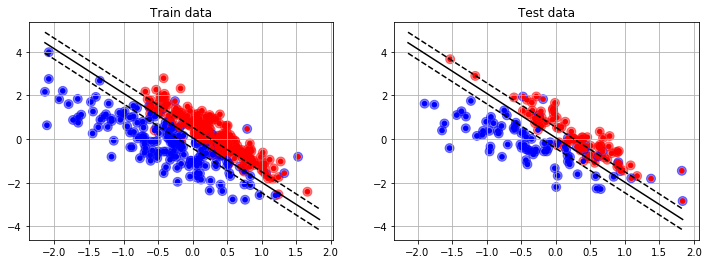

In [137]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=svmCl.predict(x_train), s=20, cmap=clrMap)
plt.plot(xx1, xx2, 'k-')
plt.plot(xx1, xx2_down, 'k--')
plt.plot(xx1, xx2_up, 'k--')
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=svmCl.predict(x_test), s=20, cmap=clrMap)
plt.plot(xx1, xx2, 'k-')
plt.plot(xx1, xx2_down, 'k--')
plt.plot(xx1, xx2_up, 'k--')
plt.grid(True)

plt.show()

<a name="6"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">6. Источники</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#example-datasets-plot-random-dataset-py">Plot randomly generated classification dataset</a><br>
<a href="http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#example-classification-plot-classifier-comparison-py">Classifier comparison</a>